# **Import Libraries and modules**

https://etherpad.net/p/vamsi-eip4

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
print (X_train.shape)

(60000, 28, 28)


Text(0.5, 1.0, '9')

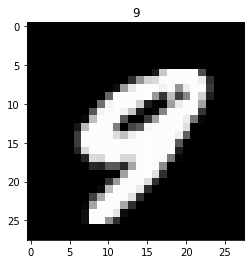

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

random_value = np.random.randint(low=0, high=len(X_train), dtype='int64')

plt.imshow(X_train[random_value], cmap='gray')
plt.title(y_train[random_value])

In [0]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model.add(Convolution2D(64, 3, 3, activation='relu')) #24
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid')) #12
model.add(Convolution2D(128, 3, 3)) # 10
model.add(Convolution2D(256, 3, 3)) # 8
model.add(Convolution2D(10, 1, 1, activation='relu'))
model.add(Convolution2D(10, 8))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  if __name__ == '__main__':


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 10)          2570      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 10)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=20, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





60000/60000 [==============================] - 20s 326us/step - loss: 0.1598 - acc: 0.9502
Epoch 2/20
60000/60000 [==============================] - 17s 283us/step - loss: 0.0549 - acc: 0.9831
Epoch 3/20
60000/60000 [==============================] - 17s 286us/step - loss: 0.0441 - acc: 0.9861
Epoch 4/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.0386 - acc: 0.9878
Epoch 5/20
60000/60000 [==============================] - 17s 283us/step - loss: 0.0333 - acc: 0.9895
Epoch 6/20
60000/60000 [==============================] - 17s 285us/step - loss: 0.0302 - acc: 0.9904
Epoch 7/20
60000/60000 [==============================] - 17s 288us/step - loss: 0.0269 - acc: 0.9913
Epoch 8/20
60000/60000 [==============================] - 17s 282us/step - loss: 0.0267 - acc: 0.9914
Epoch 9/20
60000/60000 [==============================] - 17s 283us/step - loss: 0

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.052029028391940076, 0.9898]


**with Conv2D**

In [0]:
from keras.layers import Activation
model_2 = Sequential()

model_2.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model_2.add(Conv2D(64, (3,3),activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(128, (3,3), activation='relu'))
model_2.add(Conv2D(10,1, activation='relu'))
model_2.add(Conv2D(10,10))
model_2.add(Flatten())
model_2.add(Activation('softmax'))

In [0]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 10)        1290      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)               

In [0]:
model_2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model_2.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.1418 - acc: 0.9559
Epoch 2/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0470 - acc: 0.9857
Epoch 3/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.0347 - acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0278 - acc: 0.9911
Epoch 5/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0230 - acc: 0.9925
Epoch 6/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.0180 - acc: 0.9944
Epoch 7/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0153 - acc: 0.9951
Epoch 8/10
60000/60000 [==============================] - 22s 367us/step - loss: 0.0129 - acc: 0.9958
Epoch 9/10
60000/60000 [==============================] - 22s 366us/step - loss: 0.0111 - acc: 0.9962
Epoch 10/10
60000/60000 [==============================] - 22s 371us/step - loss: 

In [0]:
score_2 = model_2.evaluate(X_test, Y_test, verbose=0)
print(score_2)

[0.030800215771311878, 0.9924]


In [0]:
print(keras.__version__)

2.2.5


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.09999341e-18 1.66198667e-17 1.49250509e-14 3.45417298e-13
  7.45240684e-23 4.64280244e-19 4.68439378e-35 1.00000000e+00
  2.43586499e-20 9.01512161e-20]
 [2.49967396e-23 2.30603428e-15 1.00000000e+00 1.98758978e-25
  1.84739187e-27 9.43384904e-31 7.74339058e-17 5.37758157e-24
  1.06181500e-20 5.42422170e-33]
 [1.07737725e-11 9.99999881e-01 6.33686770e-10 8.88493380e-14
  1.71565429e-08 2.53759822e-13 9.89020868e-16 4.88159344e-08
  3.81862909e-11 3.87846358e-13]
 [1.00000000e+00 5.24583717e-18 2.24949911e-14 6.11293762e-19
  9.01576855e-14 8.82463658e-15 1.61302596e-10 1.41066731e-15
  3.91023654e-15 5.50662922e-13]
 [3.65608795e-14 1.18392194e-17 9.62772376e-16 5.55457186e-15
  9.99998927e-01 8.42807473e-14 1.09461157e-15 2.56654325e-17
  4.33112298e-15 1.06324205e-06]
 [1.53662466e-14 9.99999285e-01 7.21862126e-09 4.77990857e-16
  1.13414789e-09 1.58610911e-15 7.84615036e-16 7.20866751e-07
  6.58242720e-13 2.31916837e-15]
 [1.03723105e-33 5.17918358e-19 6.56205030e-20 1.09106366e

In [0]:
pred_arr = list(np.argmax(arr) for arr in y_pred[:9])

print(pred_arr)
print(y_test[:9])

[7, 2, 1, 0, 4, 1, 4, 9, 5]
[7 2 1 0 4 1 4 9 5]


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

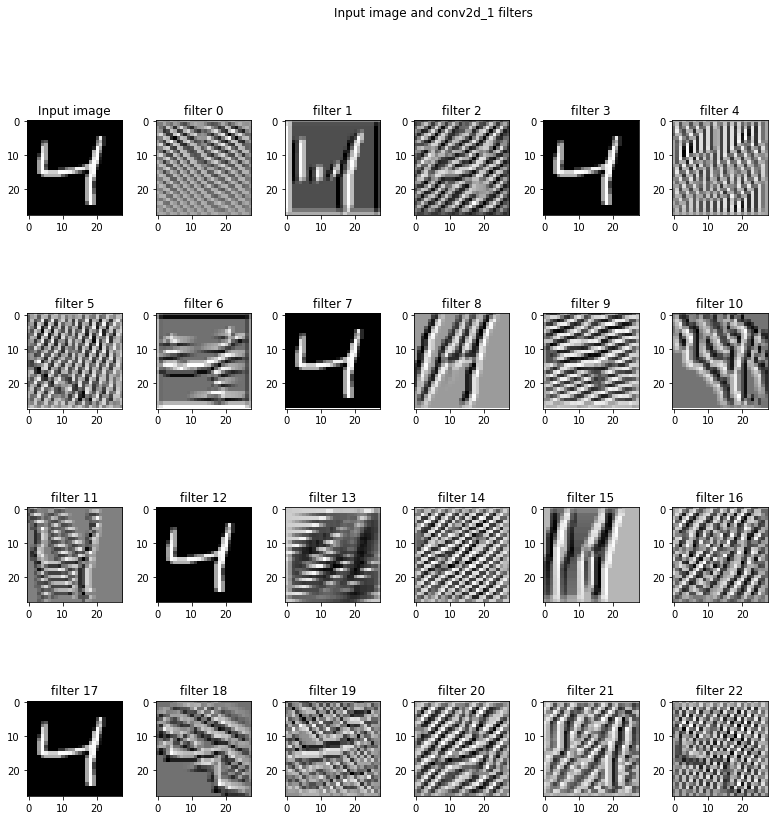

In [0]:
vis_img_in_filter(layer_name='conv2d_1')

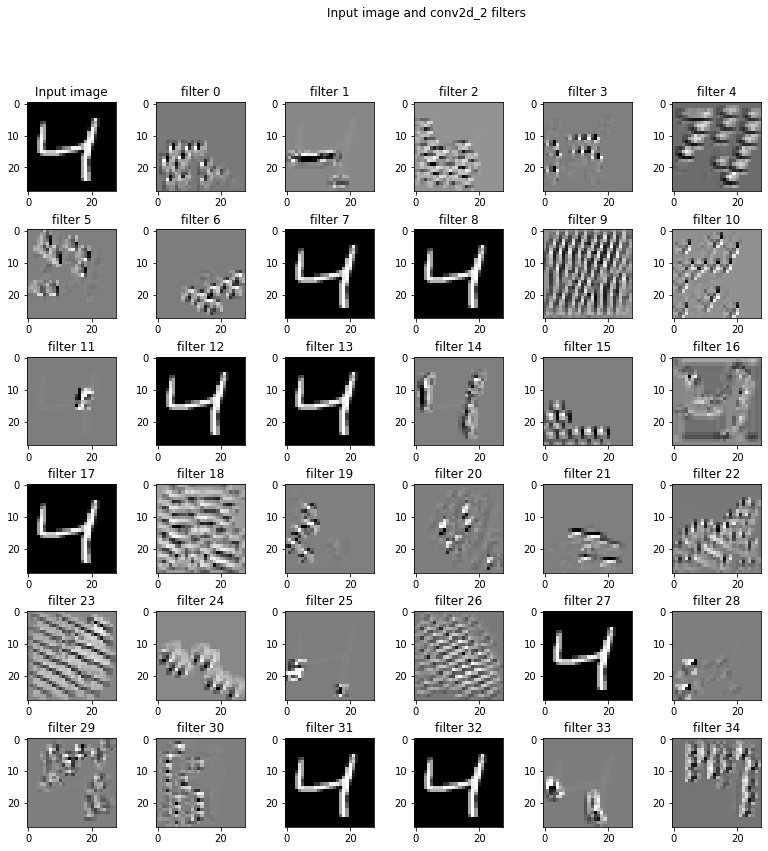

In [0]:
vis_img_in_filter(layer_name='conv2d_2')

In [0]:
from keras.layers import Activation
model_3 = Sequential()

model_3.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))) #26
model_3.add(Conv2D(64, (3,3),activation='relu')) # 24
model_3.add(MaxPooling2D()) #12
model_3.add(Conv2D(128, (3,3), activation='relu')) #10
model_3.add(Conv2D(256, (3,3), activation='relu', padding='valid')) # 8
model_3.add(Conv2D(10,1, activation='relu'))
model_3.add(Conv2D(10,8))
model_3.add(Flatten())
model_3.add(Activation('softmax'))

In [0]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 10)          2570      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 1, 1, 10)         

In [0]:
model_3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model_3.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 36s 600us/step - loss: 0.1409 - acc: 0.9571
Epoch 2/10
60000/60000 [==============================] - 35s 582us/step - loss: 0.0476 - acc: 0.9856
Epoch 3/10
60000/60000 [==============================] - 34s 572us/step - loss: 0.0344 - acc: 0.9896
Epoch 4/10
60000/60000 [==============================] - 34s 575us/step - loss: 0.0260 - acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 34s 572us/step - loss: 0.0205 - acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 34s 574us/step - loss: 0.0166 - acc: 0.9946
Epoch 7/10
60000/60000 [==============================] - 34s 569us/step - loss: 0.0134 - acc: 0.9958
Epoch 8/10
60000/60000 [==============================] - 34s 571us/step - loss: 0.0121 - acc: 0.9962
Epoch 9/10
60000/60000 [==============================] - 34s 566us/step - loss: 0.0103 - acc: 0.9969
Epoch 10/10
60000/60000 [==============================] - 34s 559us/step - loss: 

In [0]:
score_3 = model_3.evaluate(X_test, Y_test, verbose=0)
print(score_3)

[0.03227535917356877, 0.9916]
